# Look at accelerometer data 

Finding Zero velocity times by rail axis acceleration noise levels, making summary statistics for the noise levels across the whole day files.  Spot check graphs to see what works

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle to make black and white images and dashed and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '-', '-', '-']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
#Extra Headers:
import os as os
import pywt as py
import statistics as st
import os as os
import random
import multiprocessing
from joblib import Parallel, delayed
import platform

from time import time as ti

In [3]:
import CoreFunctions as cf
from skimage.restoration import denoise_wavelet

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Masking
from keras.models import Sequential
import tensorflow as tf

2023-09-26 20:37:00.938303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [6]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [7]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [8]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Recordings2/'
    imageFolder = '/sciclone/scr10/dchendrickson01/Move3Dprint/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

## Global Variables

In [9]:
Saving = False
location = folder
Titles = True
Ledgends = True

TimeSteps = 250
StepSize = 15
Features = 3
f = 0


In [10]:
BeforeTamping = ['221206 recording1.csv','221207 recording1.csv','221208 recording1.csv','221209 recording1.csv',
         '221206 recording2.csv','221207 recording2.csv','221208 recording2.csv','221209 recording2.csv']


## Project Specific Functions

In [11]:
#Smooth = cf.Smoothing(ODataSet[:,3],2) #,50)
def SmoothMoves(file):
    #    if file[-3:] =='csv':
    ODataSet = np.genfromtxt(open(folder+file,'r'), delimiter=',',skip_header=0,missing_values=0,invalid_raise=False)
    SmoothX = denoise_wavelet(ODataSet[:,3], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
    SmoothY = denoise_wavelet(ODataSet[:,4], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
    SmoothZ = denoise_wavelet(ODataSet[:,5], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
    SmoothX -= np.average(SmoothX)
    SmoothY -= np.average(SmoothY)
    SmoothZ -= np.average(SmoothZ)
    MoveMatrix = np.matrix([SmoothX, SmoothY, SmoothZ])
    return MoveMatrix
    #else:
    #    pass


In [12]:
TimeSteps = 250
StepSize = 15
PredictSize = 25
Features = 3

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps, s_step = 1, y_steps = 1):
    X, y = list(), list()
    Steps_to_take = int(len(sequences) / s_step)
    for j in range(Steps_to_take):
        i = j * s_step
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x = sequences[i:end_ix, :]
        seq_y = sequences[end_ix:end_ix+y_steps :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

## Try LSTM Stuff

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [13]:
#tf.config.threading.set_intra_op_parallelism_threads(32)
#tf.config.threading.set_inter_op_parallelism_threads(32)

In [14]:

lstm_autoencoder2 = tf.keras.models.load_model("LSTM_smaller_predict")

2023-09-26 20:37:08.758483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 20:37:08.762497: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
LoopFiles = 9

BeforeTamping[:2]

loops = int(len(BeforeTamping) / LoopFiles) 
if len(BeforeTamping)%LoopFiles != 0:
    loops += 1

st = ti()

Moves = []

for k in range(loops):
    if k == loops -1:
        tfiles = BeforeTamping[k*LoopFiles:]
    else:
        tfiles = BeforeTamping[k*LoopFiles:(k+1)*LoopFiles]
    #Results = Parallel(n_jobs=LoopFiles)(delayed(DeviationVelocity)(file) for file in tfiles)
    Results = Parallel(n_jobs=LoopFiles)(delayed(SmoothMoves)(file) for file in tfiles)
    #Results =[]
    #for file in tfiles:
    #    Results.append(DeviationVelocity(file))
    #    print(file, (ti()-st)/60.0)
    for result in Results:
        Moves.append(result)
    print(k, (ti()-st)/60.0)
        
Sequences = []
Outputs = []
for move in Moves:
    Seq, Out = split_sequences(move.T,TimeSteps,StepSize)
    Sequences.append(Seq)
    Outputs.append(Out)
print('Sequence Made ', (ti()-st)/60.0)
MoveSegments = []
for seq in Sequences:
    for mv in seq:
        MoveSegments.append(mv)
NextDataPoint = []
print('Moves Segmented ', (ti()-st)/60.0)
for out in Outputs:
    for pt in out:
        NextDataPoint.append(np.reshape(pt,(1,3)))
print('Done Prep ',(ti()-st)/60.0)

0 3.31715171734492
Sequence Made  5.435306672255198
Moves Segmented  5.492642402648926
Done Prep  5.774313918749491


In [16]:
Check1 = np.asarray(MoveSegments[:1000])

output_X = lstm_autoencoder2.predict(Check1)

32/32 [==============================] - 11s 258ms/step


In [17]:
scores = np.linalg.norm(NextDataPoint[:1000] - output_X, axis=-1)

In [18]:
maxes = np.max(scores, axis = 1)

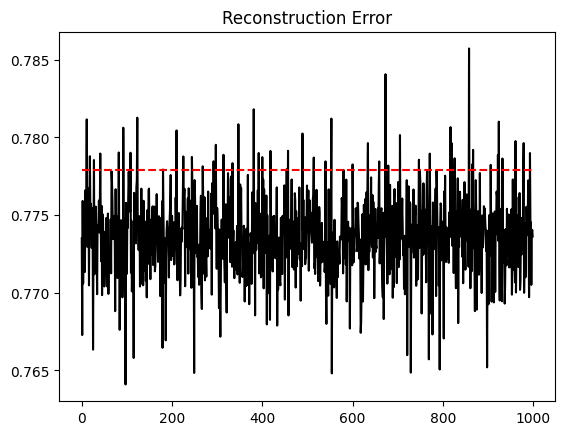

In [19]:
threshold = 0.95

sorted_scores = sorted(maxes)
threshold_score = sorted_scores[round(len(maxes) * threshold)]

plt.title("Reconstruction Error")
plt.plot(maxes)
plt.plot([threshold_score]*len(scores), c='r')
plt.show()


In [20]:
np.shape(maxes)


(1000,)

In [24]:
maxes.argmax()

858

In [ ]:
plt.title('Checking for move')
plt.plot(Moves[0][:500000,:])
plt.show()

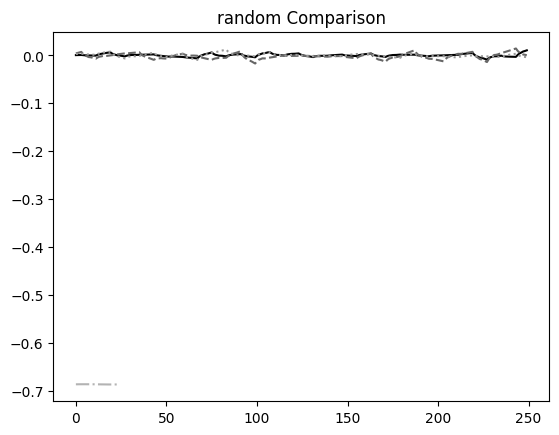

In [25]:
i=858
plt.title('random Comparison')
plt.plot(MoveSegments[i])
plt.plot(output_X[i][:,0])
plt.show()